# Hill estimator and the `Estimator` object

In this and following notebooks, estimators for extreme value parameters will be demonstrated.
An estimate includes a confidence interval.
All estimators in the `evt` package return `Estimate`s.
This notebook is a small illustration of how to work with `Estimate` objects, by taking the Hill estimator as an example.
At the same time, the Hill estimator is illustrated.

Let's continue with the dataset from the `Dataset` notebook.
It was already determined that the value 15 was a good guess for the threshold.

In [1]:
from evt.dataset import Dataset
from evt.methods.peaks_over_threshold import PeaksOverThreshold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pareto, norm

N_DATAPOINTS = 100000  # number of datapoints in the example set
NORMAL_STD = 5  # standard deviation of the normal distribution
PARETO_SHAPE = 2.5  # shape parameter of the Pareto distribution
THRESHOLD = 15  # threshold in the peaks over threshold method
EXAMPLE_NAME = 'Values'  # for nicer plots
EXAMPLE_INDEX_NAME = 'Index'

np.random.seed(0)  # enforce deterministic behaviour

series = pd.Series(
    norm.rvs(scale=NORMAL_STD, size=N_DATAPOINTS) + pareto.rvs(PARETO_SHAPE, size=N_DATAPOINTS),
    name=EXAMPLE_NAME
)
series.index.name = EXAMPLE_INDEX_NAME

dataset = Dataset(series)

peaks_over_threshold = PeaksOverThreshold(dataset, THRESHOLD)

Create a Hill estimator object.

In [2]:
from evt.estimators.hill import Hill

hill = Hill(peaks_over_threshold)

The Hill estimator is usually interpreted as a Hill plot against the number of order statistics.

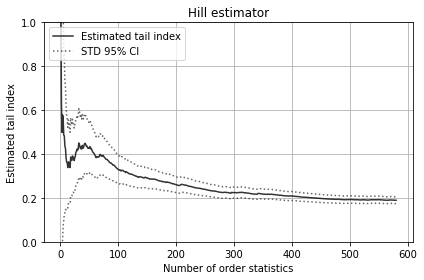

In [3]:
fig, ax = plt.subplots()

hill.plot(ax)

ax.set_ylim(0, 1)  # zoom
fig.tight_layout()
plt.show()

The confidence intervals are based on the asymptotic behaviour of the variance of the estimate.
Bias is not taken into account.
Choosing the right number of order statistics is a trade-off between variance and bias of the estimate.

It looks like bias starts to take over after approx. 100 order statistics.
Let's focus on the first 100 order statistics.

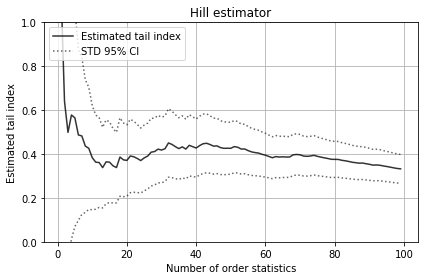

In [4]:
fig, ax = plt.subplots()

hill.plot(ax, max_number_of_order_statistics=100)

ax.set_ylim(0, 1)  # zoom
fig.tight_layout()
plt.show()

In our example, the tail index is already known to be 1/2.5 = 0.4.

# Working with `Estimate` objects
To illustrate how to work with `Estimate` objects, let's take a single Hill estimate with 40 order statistics.
Every `Estimator` has a function called `.estimate(...)`, which returns a list of `Estimate` objects.
In the case of the Hill estimator, there is only one parameter being estimated: the tail index.
Other estimators might estimate multiple parameters.

Let's get a single estimate.

In [5]:
estimate, = hill.estimate(40)
estimate

Estimate(estimate=0.42749102777911085, ci_lower=0.29501262009297874, ci_upper=0.5599694354652429, confidence_level=0.95)

The numerical value of the estimate is approx. 0.42.
Moreover, the lower- and upper-bounds of a 95% confidence interval are indicated.
`Estimate` objects can be unpacked like tuples.

In [6]:
tail_index, ci_lower, ci_upper = estimate
tail_index

0.42749102777911085